In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import random
import cufflinks as cf
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
import seaborn as sns
import chart_studio.plotly as pt
import plotly.express as px
from adFuller import stationarity_or_not_ad_fuller

In [90]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf,acf
import plotly.graph_objects as go

In [3]:
from plotly.offline import iplot,plot,init_notebook_mode,download_plotlyjs

In [4]:
init_notebook_mode()

In [5]:
cf.go_offline()
%matplotlib inline

In [6]:
finalcsv = pd.read_csv('FinalMalaria.csv',index_col = 'DATE(IST)')

In [7]:
finalcsv

ALTITUDE(m)  AIR_TEMP(°C)  WIND_SPEED(m/s)  WIND_DIRECTION(deg)  \
DATE(IST)                                                                     
31-01-2010           11            21         1.329630           108.386296   
28-02-2010           11            24         1.112308           224.283462   
31-03-2010           11            29         0.699615           182.606923   
30-04-2010           11            33         1.057895           218.488947   
31-05-2010           11            35         1.326923           242.535769   
30-06-2010           11            33         1.030000           233.263448   
31-07-2010           11            29         2.054400           164.174400   
31-08-2010           11            28         1.610526           218.426316   
30-09-2010           11            28         0.750000           229.139142   
31-10-2010           11            29         0.296552           229.139142   
30-11-2010           11            25         0.829200           229.139142   
31-12-2010           11            22         1.003571           229.139142   
31-01-2011           11            22         1.062069           200.055172   
28-02-2011           11            25         0.964000           196.128000   
31-03-2011           11            30         0.860000           202.910000   
30-04-2011           11            33         0.731034           136.672414   
31-05-2011           11            34         1.535484           204.458065   
30-06-2011           11            34         2.393103           170.637931   
31-07-2011           11            31         1.722581           212.235484   
31-08-2011           11            29         1.670000           182.620000   
30-09-2011           11            30         1.310345           168.517241   
31-10-2011           11            30         0.467857           249.353571   
30-11-2011           11            28         0.582609           311.830435   
31-12-2011           11            23         0.756000           196.388000   
31-01-2012           11            20         1.220690           201.565517   
29-02-2012           11            23         1.254545           223.268182   
31-03-2012           11            28         0.764286           185.057143   
30-04-2012           11            34         0.957143           177.725000   
31-05-2012           11            35         1.476471           184.017647   
30-06-2012           11            34         1.761538           170.615385   
...                 ...           ...              ...                  ...   
31-07-2017           11            28         3.312903            95.706452   
31-08-2017           11            29         2.451613           125.003226   
30-09-2017           11            30         0.913333           207.136667   
31-10-2017           11            30         0.654839           281.154839   
30-11-2017           11            25         0.773333           279.370000   
31-12-2017           11            22         1.790323           208.822581   
31-01-2018           11            21         0.900000           258.561290   
28-02-2018           11            25         1.000000           217.517857   
31-03-2018           11            30         1.400000           210.206452   
30-04-2018           11            34         1.136667           283.643333   
31-05-2018           11            37         1.674194           330.706452   
30-06-2018           11            35         1.226667           340.360000   
31-07-2018           11            30         1.276539           359.200000   
31-08-2018           11            29         1.276539           359.187097   
30-09-2018           11            29         1.276539           359.193103   
31-10-2018           11            31         1.276539           229.139142   
30-11-2018           11            26         1.276539           229.139142   
31-12-2018           11            20         1.276539        

In [8]:
finalcsv.drop('ALTITUDE(m)',axis=1,inplace=True)

In [9]:
tempcsv = pd.read_csv('FinalMalaria.csv')

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
decomposition = seasonal_decompose(finalcsv['Malaria_cases'],period=12)

In [12]:
fig = make_subplots(specs = [[{'secondary_y':True}]])
fig.add_trace(go.Scatter(x=tempcsv['DATE(IST)'],y=decomposition.trend,name='Trend',mode='lines'))
fig.add_trace(go.Scatter(x=tempcsv['DATE(IST)'],y=decomposition.seasonal,name='Seasonal',mode='lines'))
fig.add_trace(go.Scatter(x=tempcsv['DATE(IST)'],y=decomposition.resid,name='Noise',mode='lines'))
fig.add_trace(go.Scatter(x=tempcsv['DATE(IST)'],y=finalcsv['Malaria_cases'],name='Malaria cases',mode='lines'))
fig.update_layout(title_text='Trend, Seasonality and Noise with Number of Malaria Cases registerd')

# ARIMA

In [13]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,r2_score

In [14]:
#To get the valueof p,d,q -> we use autocorrelation and malaria cases regiesterd chart

In [15]:
mean_values=[]

In [16]:
for i in range(0,len(finalcsv)+1,12):
    mean_values.append(finalcsv.iloc[i:i+12,8].mean())

In [17]:
# from pandas.plotting import autocorrelation_plot
# plt.figure(figsize=(10,8))
# autocorrelation_plot(finalcsv['Malaria_cases']) # Here we can see the positive correlation on certain points on the graph so we will tak ethe value of p as 12.

In [18]:
from statsmodels.tsa.stattools import acf

results = acf(finalcsv['Malaria_cases'],unbiased=True,nlags=48)

fig = go.Figure()
trace1 = fig.add_trace(go.Scatter(y=results))
fig.update_xaxes(title_text='Months Prior')
fig.show()

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [19]:
from statsmodels.tsa.stattools import pacf

results = pacf(finalcsv['Malaria_cases'],nlags=12)

acf = px.line(y=results,title='Partial Auto-correlation fucntion of malaria cases showing last 12 months')
acf.update_xaxes(title_text = 'Months Prior')
acf.show()

Here, we get the maximum Auto_correlation value at 12

In [20]:
X = finalcsv['Malaria_cases'].values

In [21]:
X1 = X.reshape(-1,1)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X2 = scaler.fit_transform(X1)

c:\users\madhav\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

c:\users\madhav\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [25]:
size = int(len(X2) * 0.9)

In [26]:
arima_train,arima_test = X2[0:size],X2[size:len(X2)]

In [27]:
arima_history = [x for x in arima_train]
arima_prediction = []

In [28]:
for i in range(len(arima_test)):
    arima_model = ARIMA(arima_history,order=(12,1,0))
    arima_model_fit = arima_model.fit(disp=1,start_ar_lags=12,method='css-mle',solver='bfgs')
    output = arima_model_fit.forecast()
    arima_prediction.append(output[0])
    arima_history.append(arima_test[i])
    print('predicted={0}/texpected={1}'.format(output[0],arima_test[i]))

Optimization terminated successfully.
         Current function value: 0.339959
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41
predicted=[-1.23720138]/texpected=[-1.21171823]
Optimization terminated successfully.
         Current function value: 0.334892
         Iterations: 37
         Function evaluations: 42
         Gradient evaluations: 42
predicted=[-1.19271295]/texpected=[-1.21888719]
Optimization terminated successfully.
         Current function value: 0.329875
         Iterations: 37
         Function evaluations: 42
         Gradient evaluations: 42
predicted=[-1.11861223]/texpected=[-1.11852177]
Optimization terminated successfully.
         Current function value: 0.324879
         Iterations: 37
         Function evaluations: 42
         Gradient evaluations: 42
predicted=[-0.94678015]/texpected=[-1.01636412]
Optimization terminated successfully.
         Current function value: 0.320134
         Iterations: 39
         Functio

In [29]:
arima_prediction1 = scaler.inverse_transform(arima_prediction)
arima_test1 = scaler.inverse_transform(arima_test)

In [30]:
arima_prediction1,arima_test1

(array([[ 45.7813943 ],
        [ 70.6042061 ],
        [111.94953124],
        [207.82514818],
        [325.81839397],
        [330.80189272],
        [532.40213997],
        [685.34811922],
        [549.39461994],
        [310.25161268],
        [296.39896577],
        [114.41348216]]), array([[ 60.],
        [ 56.],
        [112.],
        [169.],
        [198.],
        [253.],
        [510.],
        [757.],
        [537.],
        [517.],
        [343.],
        [160.]]))

In [31]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(arima_test1,arima_prediction1) * 100)))

Accuracy is 87%


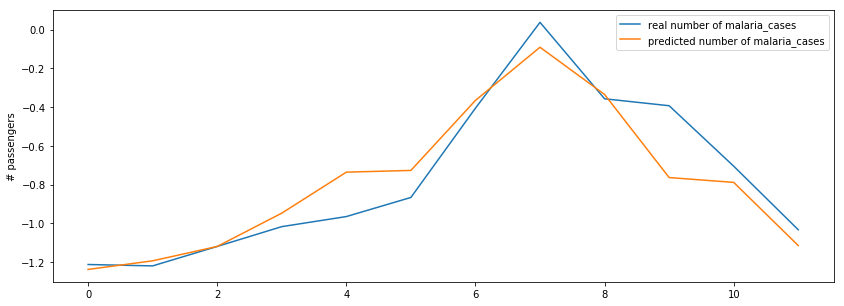

In [32]:
plt.figure(figsize=(14,5))
plt.plot(arima_test, label = 'real number of malaria_cases')
plt.plot(arima_prediction, label = 'predicted number of malaria_cases')
plt.ylabel('# passengers')
plt.legend()
plt.show()

# SARIMA

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
X = finalcsv['Malaria_cases'].values
sarima_len = int(len(finalcsv) * 0.9)

In [35]:
sarima_train,sarima_test = X[0:sarima_len],X[sarima_len:len(X)]

In [36]:
# finalcsv['Malaria_cases'].iplot(title='Malaria cases reported through 2010-2019',xTitle='Years')

Here We can see that the graph shows no significant trend but it shows seasonality

In [37]:
stationarity_or_not_ad_fuller(X)

Results of Dickey-Fuller Test:
Test Statistic                  -0.830413
p-value                          0.810025
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


Here the p-value is < 0.05, so we can say that our data is not stationary. And our ADF statistics(-0.8304) > Critical value (-2.8892), we can say that we are rejecting the alternate hypothesis and getting null hypothesis.

In [38]:
sarima_pred = []
sarima_history = [x for x in sarima_train]

In [39]:
for i in range(len(sarima_test)):
    sarima_model =SARIMAX(sarima_history, trend='c', order=(1,1,0), seasonal_order=(2,0,0,12),enforce_invertibility=False,
                       enforce_stationarity=False)
    sarima_result = sarima_model.fit()
    sarima_output = sarima_result.forecast()
    sarima_pred.append(sarima_output[0])
    sarima_history.append(sarima_test[i])
    print('predicted={0}/texpected={1}'.format(sarima_output[0],sarima_test[i]))

predicted=56.22144684795015/texpected=60
predicted=71.19090851707661/texpected=56
predicted=124.58664437922761/texpected=112
predicted=186.11586094797696/texpected=169
predicted=273.5904190503491/texpected=198
predicted=195.7894972284658/texpected=253
predicted=470.19909525311493/texpected=510
predicted=675.2475497311805/texpected=757
predicted=456.4674536844758/texpected=537
predicted=441.7682885784894/texpected=517
predicted=392.719302260727/texpected=343
predicted=225.23647330866433/texpected=160


In [40]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(sarima_test,sarima_pred) * 100)))

Accuracy is 94%


In [41]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [42]:
mean_absolute_percentage_error(sarima_test,sarima_pred)

18.25000235343538

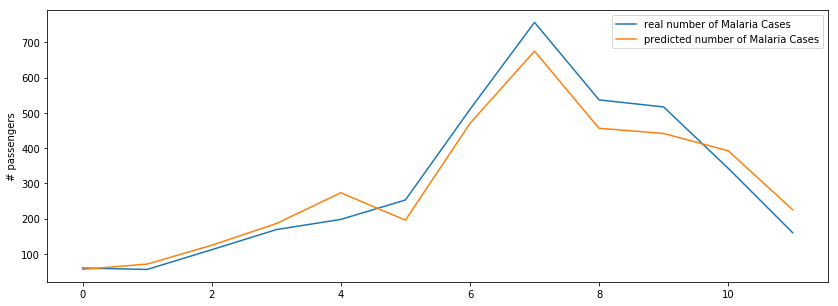

In [43]:
plt.figure(figsize=(14,5))
plt.plot(sarima_test, label = 'real number of Malaria Cases')
plt.plot(sarima_pred, label = 'predicted number of Malaria Cases')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [44]:
tempDF = pd.DataFrame()

In [45]:
tempDF['Malaria_cases'] = X

In [46]:
tempDF['Predicted'] = np.NaN

In [47]:
tempDF['Predicted'][-12:] = sarima_pred

In [48]:
tempDF[['Malaria_cases','Predicted']].iplot()

# SARIMAX model

In [49]:
# from pmdarima.arima import auto_arima

In [132]:
train = finalcsv[['HUMIDITY(%)','rain_days']].values
test = finalcsv['Malaria_cases'].values

test = test.reshape(-1,1)

scaler1 = StandardScaler()
scaler2 = StandardScaler()

train = scaler1.fit_transform(train)
test = scaler2.fit_transform(test)

auto_X_train,auto_X_test,auto_y_train,auto_y_test = train_test_split(train,test,test_size = 0.1,shuffle=False)

auto_predict = []
auto_history_X = [x for x in auto_X_train]
auto_history_y = [y for y in auto_y_train]

c:\users\madhav\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

c:\users\madhav\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [133]:
for i in range(len(auto_X_test)):
    auto_model =SARIMAX(auto_history_y,exog=auto_history_X,trend='c', order=(1,1,0), seasonal_order=(2,0,0,12),enforce_invertibility=False,
                       enforce_stationarity=False)
    auto_result = auto_model.fit()
    auto_output = auto_result.forecast(exog=auto_X_test[i])
    auto_predict.append(auto_output[0])
    auto_history_y.append(auto_y_test[i])
    auto_history_X.append(auto_X_test[i])
    print('predicted={0}/texpected={1}'.format(auto_output[0],auto_y_test[i]))

predicted=-1.3110278029584341/texpected=[-1.21171823]
predicted=-1.2471296673850238/texpected=[-1.21888719]
predicted=-1.051459171551977/texpected=[-1.11852177]
predicted=-0.8920261401412073/texpected=[-1.01636412]
predicted=-0.9945408192880519/texpected=[-0.96438917]
predicted=-0.9463111690753712/texpected=[-0.865816]
predicted=-0.5480935039608281/texpected=[-0.40521043]
predicted=0.00021736732992924668/texpected=[0.03747274]
predicted=-0.4140392293312827/texpected=[-0.35681996]


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.5609308349807601/texpected=[-0.39266475]
predicted=-0.7420689145981237/texpected=[-0.70451444]
predicted=-0.9212917543810819/texpected=[-1.03249427]


In [134]:
auto_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(1, 1, 0)x(2, 0, 0, 12)   Log Likelihood                 -19.351
Date:                            Mon, 20 Apr 2020   AIC                             52.703
Time:                                    12:36:05   BIC                             70.431
Sample:                                         0   HQIC                            59.861
                                            - 119                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.802e-05      0.043      0.002      0.999      -0.084       0.084
x1             0.1049      0.072      1.454      0.146      -0.036       0.246
x2            -0.0223      0.081     -0.275      0.783      -0.181       0.136
ar.L1         -0.2013      0.101     -1.984      0.047      -0.400      -0.002
ar.S.L12       0.5946      0.114      5.212      0.000       0.371       0.818
ar.S.L24       0.1119      0.092      1.217      0.224      -0.068       0.292
sigma2         0.0888      0.010      8.925      0.000       0.069       0.108
===================================================================================
Ljung-Box (Q):                       45.34   Jarque-Bera (JB):                36.20
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.63
Prob(H) (two-sided):                  0.31   Kurtosis:                         5.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [135]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(auto_y_test,auto_predict) * 100)))

Accuracy is 95%


In [53]:
# test = test.reshape(-1,1)

# scaler1 = StandardScaler()
# scaler2 = StandardScaler()

# train = scaler1.fit_transform(train)
# test = scaler2.fit_transform(test)

# auto_X_train,auto_X_test,auto_y_train,auto_y_test = train_test_split(train,test,test_size = 0.1,shuffle=False)

# auto_predict = []
# auto_history_X = [x for x in auto_X_train]
# auto_history_y = [y for y in auto_y_train]

In [54]:
auto_predict_final = scaler2.inverse_transform(auto_predict)

In [55]:
auto_predict_final

array([  4.58911931,  40.24179489, 149.41832481, 238.37575832,
       181.17655265, 208.08682252, 430.27679879, 736.21294919,
       505.07387263, 423.11406714, 322.04606053, 222.04668328])

In [56]:
auto_y_test_final = scaler2.inverse_transform(auto_y_test)

In [57]:
auto_y_test_final

array([[ 60.],
       [ 56.],
       [112.],
       [169.],
       [198.],
       [253.],
       [510.],
       [757.],
       [537.],
       [517.],
       [343.],
       [160.]])

In [58]:
auto_predict_final,auto_y_test_final

(array([  4.58911931,  40.24179489, 149.41832481, 238.37575832,
        181.17655265, 208.08682252, 430.27679879, 736.21294919,
        505.07387263, 423.11406714, 322.04606053, 222.04668328]),
 array([[ 60.],
        [ 56.],
        [112.],
        [169.],
        [198.],
        [253.],
        [510.],
        [757.],
        [537.],
        [517.],
        [343.],
        [160.]]))

In [138]:
mean_absolute_percentage_error(auto_y_test_final,auto_predict_final)

136.85798177741003

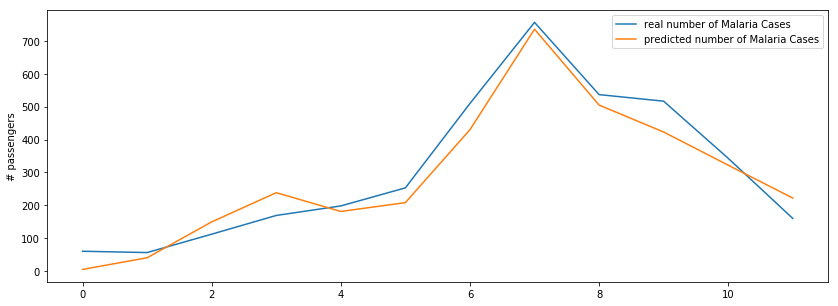

In [59]:
plt.figure(figsize=(14,5))
plt.plot(auto_y_test_final, label = 'real number of Malaria Cases')
plt.plot(auto_predict_final, label = 'predicted number of Malaria Cases')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [60]:
tempDf = pd.DataFrame()

In [61]:
tempDF = finalcsv

In [62]:
tempDF['predicted'] = np.NaN

In [63]:
tempDF['predicted'][-12:] = auto_predict_final

In [64]:
tempDF[['Malaria_cases','predicted']].iplot()

Now that we know that SARIMAX and SARIMA model is working best for us, now it's time to try new results for these models.

In [65]:
malaria_cases = pd.read_csv('2005-2019_Malaria_Cases.csv')

malaria_cases.columns = ['Year', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Sum']

malaria_cases.index = malaria_cases['Year']

malaria_cases.drop(['Year','Sum'],inplace=True,axis=1)

malaria_cases_list = []

for i in range(malaria_cases.shape[1]):
    for j in range(malaria_cases.shape[0]):
        malaria_cases_list.append(malaria_cases.iloc[j,i])

fig = px.line(y=malaria_cases_list)
fig.show()

# Predicting one step in future

one_size = int(len(malaria_cases_list)*0.999)

one_train,one_test = malaria_cases_list[:-one_size],malaria_cases_list[:]

In [66]:
stationarity_or_not_ad_fuller(malaria_cases_list)

Results of Dickey-Fuller Test:
Test Statistic                  -1.015055
p-value                          0.747734
#Lags Used                      13.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [67]:
temp = pd.DataFrame()
temp = finalcsv['Malaria_cases'].diff()

In [68]:
temp.dropna(inplace=True)

In [69]:
stationarity_or_not_ad_fuller(temp)

Results of Dickey-Fuller Test:
Test Statistic                  -4.252481
p-value                          0.000536
#Lags Used                      12.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [70]:
temp.head()

DATE(IST)
28-02-2010    -11.0
31-03-2010     73.0
30-04-2010    192.0
31-05-2010    175.0
30-06-2010   -148.0
Name: Malaria_cases, dtype: float64

In [71]:
df_example = pd.DataFrame()
df_example['ts'] = finalcsv['Malaria_cases']

In [72]:
def test_stationarity(df, ts): 
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [73]:
def plot_transformed_data(df, ts, ts_transform):
    # Plot time series data
    f, ax = plt.subplots(1,1)
    ax.plot(df[ts])
    ax.plot(df[ts_transform], color = 'red')

    # Add title
    ax.set_title('%s and %s time-series graph' %(ts, ts_transform))

    # Rotate x-labels
    ax.tick_params(axis = 'x', rotation = 45)

    # Add legend
    ax.legend([ts, ts_transform])

    plt.show()
    plt.close()

    return

ts    ts_log  ts_log_moving_avg  ts_moving_avg  ts_log_diff  \
DATE(IST)                                                                   
31-12-2010  1043  6.949856           6.749505    1132.750000    -0.313473   
31-01-2011   491  6.196444           6.793673    1149.583333    -0.753412   
28-02-2011   333  5.808142           6.808717    1154.166667    -0.388302   
31-03-2011   385  5.953243           6.816422    1157.000000     0.145101   
30-04-2011   624  6.436150           6.828008    1163.750000     0.482907   

            ts_moving_avg_diff  ts_log_moving_avg_diff  ts_log_ewma  \
DATE(IST)                                                             
31-12-2010          -89.750000                0.200351     6.949856   
31-01-2011         -658.583333               -0.597229     6.562274   
28-02-2011         -821.166667               -1.000574     6.296245   
31-03-2011         -772.000000               -0.863178     6.202928   
30-04-2011         -539.750000               -0.391858     6.255110   

            ts_log_ewma_diff  
DATE(IST)                     
31-12-2010          0.000000  
31-01-2011         -0.365829  
28-02-2011         -0.488102  
31-03-2011         -0.249685  
30-04-2011          0.181040

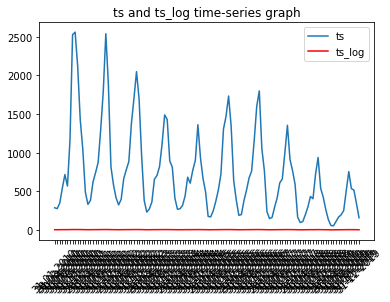

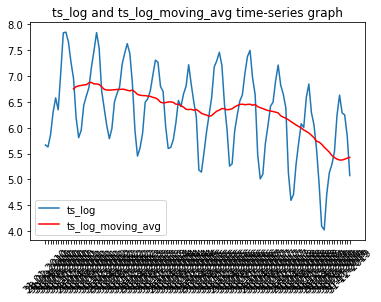

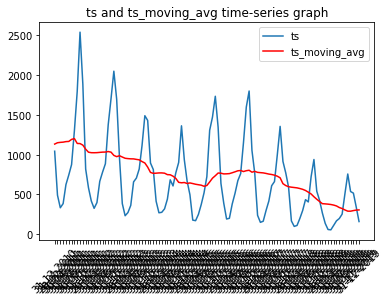

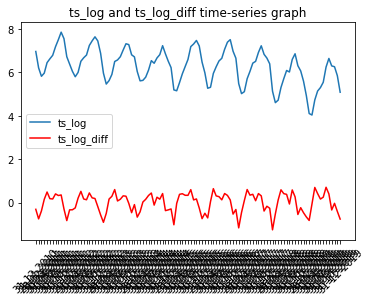

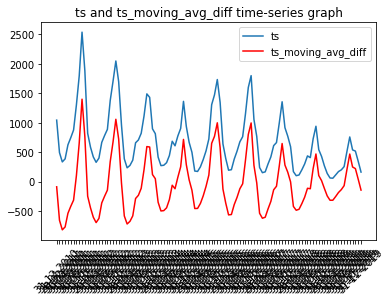

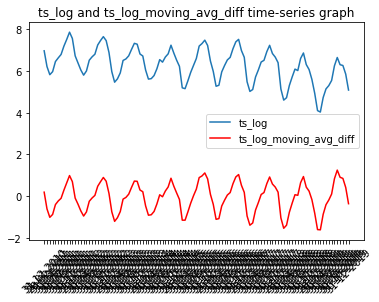

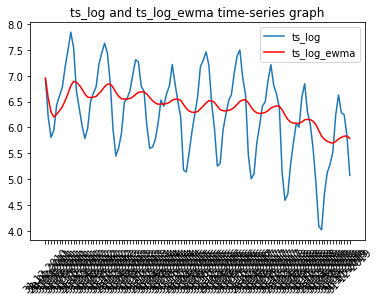

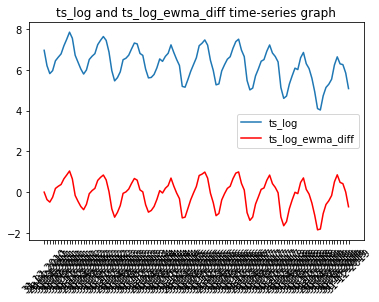

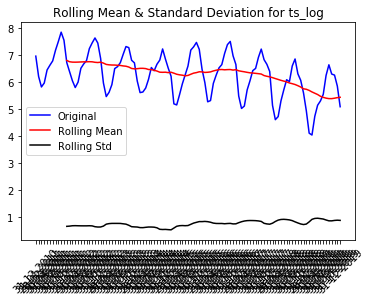

Results of Dickey-Fuller Test:
Test Statistic                  0.058421
p-value                         0.963105
# Lags Used                    13.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


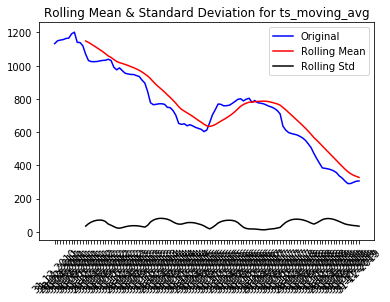

Results of Dickey-Fuller Test:
Test Statistic                  -0.690329
p-value                          0.849239
# Lags Used                      1.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


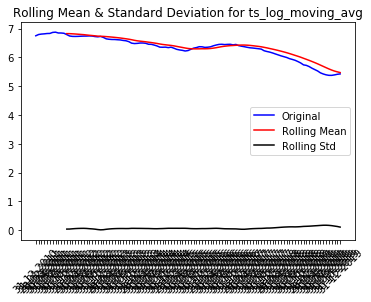

Results of Dickey-Fuller Test:
Test Statistic                   0.467057
p-value                          0.983837
# Lags Used                      1.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


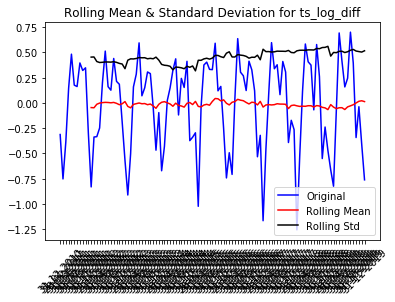

Results of Dickey-Fuller Test:
Test Statistic                 -3.226881
p-value                         0.018480
# Lags Used                    12.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


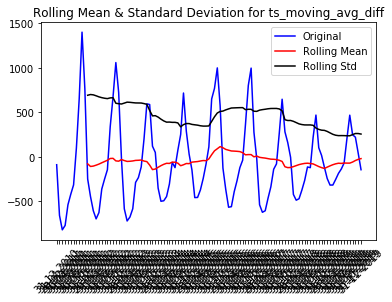

Results of Dickey-Fuller Test:
Test Statistic                 -2.017981
p-value                         0.278745
# Lags Used                    12.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


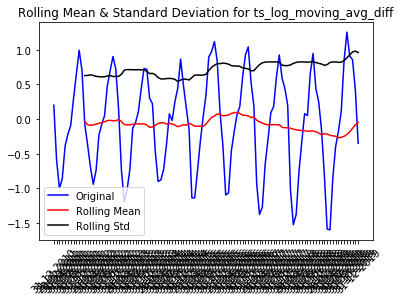

Results of Dickey-Fuller Test:
Test Statistic                 -1.926683
p-value                         0.319614
# Lags Used                    13.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


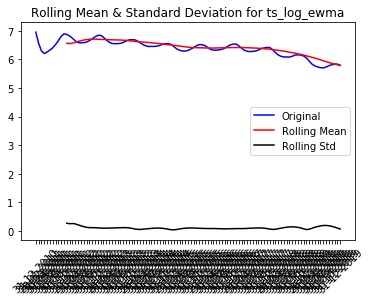

Results of Dickey-Fuller Test:
Test Statistic                  1.003063
p-value                         0.994298
# Lags Used                    13.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


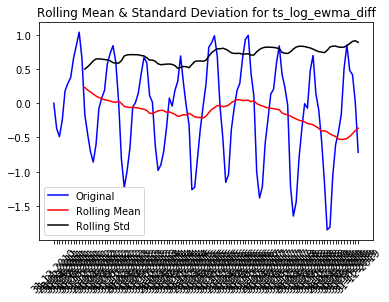

Results of Dickey-Fuller Test:
Test Statistic                 -1.598637
p-value                         0.484278
# Lags Used                    13.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [74]:
# Transformation - log ts
df_example['ts_log'] = df_example['ts'].apply(lambda x: np.log(x))

# Transformation - 12-Month moving averages of log ts
df_example['ts_log_moving_avg'] = df_example['ts_log'].rolling(window = 12,
                                                               center = False).mean()

# Transformation - 12-Month moving average ts
df_example['ts_moving_avg'] = df_example['ts'].rolling(window = 12,
                                                       center = False).mean()

# Transformation - Difference between logged ts and first-order difference logged ts
# df_example['ts_log_diff'] = df_example['ts_log'] - df_example['ts_log'].shift()
df_example['ts_log_diff'] = df_example['ts_log'].diff()

# Transformation - Difference between ts and moving average ts
df_example['ts_moving_avg_diff'] = df_example['ts'] - df_example['ts_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
df_example['ts_log_moving_avg_diff'] = df_example['ts_log'] - df_example['ts_log_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
df_example_transform = df_example.dropna()

# Transformation - Logged exponentially weighted moving averages (EWMA) ts
df_example_transform['ts_log_ewma'] = df_example_transform['ts_log'].ewm(halflife = 12,
                                                                         ignore_na = False,
                                                                         min_periods = 0,
                                                                         adjust = True).mean()

# Transformation - Difference between logged ts and logged EWMA ts
df_example_transform['ts_log_ewma_diff'] = df_example_transform['ts_log'] - df_example_transform['ts_log_ewma']

# Display data
display(df_example_transform.head())

# Plot data
plot_transformed_data(df = df_example, 
                      ts = 'ts', 
                      ts_transform = 'ts_log')
# Plot data
plot_transformed_data(df = df_example, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts', 
                      ts_transform = 'ts_moving_avg')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_diff')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts', 
                      ts_transform = 'ts_moving_avg_diff')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg_diff')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma_diff')

# Perform stationarity test
test_stationarity(df = df_example_transform, 
                  ts = 'ts_log')

# Perform stationarity test
test_stationarity(df = df_example_transform, 
                  ts = 'ts_moving_avg')

# Perform stationarity test
test_stationarity(df = df_example_transform, 
                  ts = 'ts_log_moving_avg')

# Perform stationarity test
test_stationarity(df = df_example_transform,
                  ts = 'ts_log_diff')

# Perform stationarity test
test_stationarity(df = df_example_transform,
                  ts = 'ts_moving_avg_diff')

# Perform stationarity test
test_stationarity(df = df_example_transform,
                  ts = 'ts_log_moving_avg_diff')

# Perform stationarity test
test_stationarity(df = df_example_transform, 
                  ts = 'ts_log_ewma')

# Perform stationarity test
test_stationarity(df = df_example_transform,
                  ts = 'ts_log_ewma_diff')

In [75]:
df_example

ts    ts_log  ts_log_moving_avg  ts_moving_avg  ts_log_diff  \
DATE(IST)                                                                   
31-01-2010   289  5.666427                NaN            NaN          NaN   
28-02-2010   278  5.627621                NaN            NaN    -0.038806   
31-03-2010   351  5.860786                NaN            NaN     0.233165   
30-04-2010   543  6.297109                NaN            NaN     0.436323   
31-05-2010   718  6.576470                NaN            NaN     0.279360   
30-06-2010   570  6.345636                NaN            NaN    -0.230833   
31-07-2010  1174  7.068172                NaN            NaN     0.722536   
31-08-2010  2526  7.834392                NaN            NaN     0.766220   
30-09-2010  2558  7.846981                NaN            NaN     0.012589   
31-10-2010  2116  7.657283                NaN            NaN    -0.189698   
30-11-2010  1427  7.263330                NaN            NaN    -0.393953   
31-12-2010  1043  6.949856           6.749505    1132.750000    -0.313473   
31-01-2011   491  6.196444           6.793673    1149.583333    -0.753412   
28-02-2011   333  5.808142           6.808717    1154.166667    -0.388302   
31-03-2011   385  5.953243           6.816422    1157.000000     0.145101   
30-04-2011   624  6.436150           6.828008    1163.750000     0.482907   
31-05-2011   744  6.612041           6.830973    1165.916667     0.175891   
30-06-2011   875  6.774224           6.866688    1191.333333     0.162183   
31-07-2011  1300  7.170120           6.875184    1201.833333     0.395896   
31-08-2011  1793  7.491645           6.846622    1140.750000     0.321526   
30-09-2011  2538  7.839132           6.845968    1139.083333     0.347486   
31-10-2011  1883  7.540622           6.836246    1119.666667    -0.298510   
30-11-2011   819  6.708084           6.789975    1069.000000    -0.832537   
31-12-2011   584  6.369901           6.741646    1030.750000    -0.338183   
31-01-2012   418  6.035481           6.728232    1024.666667    -0.334420   
29-02-2012   326  5.786897           6.726462    1024.083333    -0.248584   
31-03-2012   398  5.986452           6.729229    1025.166667     0.199555   
30-04-2012   665  6.499787           6.734532    1028.583333     0.513335   
31-05-2012   781  6.660575           6.738577    1031.666667     0.160788   
30-06-2012   886  6.786717           6.739618    1032.583333     0.126142   
...          ...       ...                ...            ...          ...   
31-07-2017   998  6.905753           6.300208     729.583333     0.410488   
31-08-2017  1355  7.211557           6.286462     709.333333     0.305803   
30-09-2017   915  6.818924           6.230123     635.666667    -0.392633   
31-10-2017   770  6.646391           6.203881     611.916667    -0.172534   
30-11-2017   591  6.381816           6.182376     597.416667    -0.264574   
31-12-2017   168  5.123964           6.153350     591.583333    -1.257852   
31-01-2018    99  4.595120           6.118724     587.333333    -0.528844   
28-02-2018   111  4.709530           6.086196     582.916667     0.114410   
31-03-2018   199  5.293305           6.052547     574.666667     0.583775   
30-04-2018   299  5.700444           6.024627     564.750000     0.407139   
31-05-2018   435  6.075346           5.996451     550.166667     0.374902   
30-06-2018   406  6.006353           5.955709     528.833333    -0.068993   
31-07-2018   724  6.584791           5.928962     506.000000     0.578438   
31-08-2018   939  6.844815           5.898400     471.333333     0.260024   
30-09-2018   541  6.293419           5.854608     440.166667    -0.551396   
31-10-2018   426  6.054439           5.805279     411.500000    -0.238980   
30-11-2018   266  5.583496           5.738752     384.416667    -0.470943   
31-12-2018   137  4.919981           5.721753     381.833333    -0.663515   
31-01-2019    60  4.094345           5.680022     378.583333    -0.825636   
28-02-2019

In [76]:
dropped_df = df_example['ts_log_diff'].dropna()

In [130]:
px.line(y=dropped_df)

In [126]:
pacf_gastro = pacf(dropped_df,nlags=24)

px.line(y=pacf_gastro,title='Partial Autocorrelation')

In [127]:
acf_gastro = acf(dropped_df,nlags=84,fft=False)

In [128]:
px.line(y=acf_gastro,title='Autocorrelation')

In [93]:
X = dropped_df
sarima_len = int(len(dropped_df) * 0.9)

sarima_train,sarima_test = X[0:sarima_len],X[sarima_len:len(X)]

In [94]:
sarima_pred = []
sarima_history = [x for x in sarima_train]

for i in range(len(sarima_test)):
    sarima_model =SARIMAX(sarima_history, trend='n', order=(2,0,0), seasonal_order=(1,0,1,12),enforce_invertibility=False,
                       enforce_stationarity=False)
    sarima_result = sarima_model.fit()
    sarima_output = sarima_result.forecast()
    sarima_pred.append(sarima_output[0])
    sarima_history.append(sarima_test[i])
    print('predicted={0}/texpected={1}'.format(sarima_output[0],sarima_test[i]))

predicted=-0.6216408906410222/texpected=-0.8256363636060247
predicted=0.06529861365757328/texpected=-0.06899287148695077
predicted=0.6714423765394769/texpected=0.6931471805599445
predicted=0.378009586895435/texpected=0.4113998436279793
predicted=0.3078185095390531/texpected=0.1583683157714617
predicted=0.07089753694766238/texpected=0.24512245803298516
predicted=0.4848845409746837/texpected=0.7010212369908508
predicted=0.15012010216243912/texpected=0.3949525277190773
predicted=-0.4062059719383941/texpected=-0.34336515892858355
predicted=-0.29969545000640824/texpected=-0.03795522000043583
predicted=-0.47289696335143927/texpected=-0.4103124273424896
predicted=-0.9237422833603832/texpected=-0.7625566319321129


In [124]:
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   95
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -377.707
Date:                              Mon, 20 Apr 2020   AIC                            765.415
Time:                                      12:31:13   BIC                            777.387
Sample:                                           0   HQIC                           770.218
                                               - 95                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6050      0.045     35.700      0.000       1.517       1.693
ar.L2         -0.9304      0.035    -26.683      0.000      -0.999      -0.862
ar.S.L12       0.8572      0.030     28.973      0.000       0.799       0.915
ma.S.L12      -0.8359      0.270     -3.101      0.002      -1.364      -0.308
sigma2       555.7620    119.046      4.668      0.000     322.437     789.087
===================================================================================
Ljung-Box (Q):                      219.72   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.00   Prob(JB):                         0.38
Heteroskedasticity (H):               0.61   Skew:                            -0.01
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(sarima_test,sarima_pred) * 100)))

Accuracy is 90%


In [96]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [97]:
mean_absolute_percentage_error(sarima_test,sarima_pred)

102.76356506882411

In [98]:
from pmdarima import auto_arima

In [99]:
a= pd.DataFrame()
a['t'] = [1,2,3,4,5]

In [100]:
t = np.log(a)

In [101]:
t

t
0  0.000000
1  0.693147
2  1.098612
3  1.386294
4  1.609438

In [102]:
t1 = t.diff()

In [103]:
t1

t
0       NaN
1  0.693147
2  0.405465
3  0.287682
4  0.223144

In [104]:
t2 = np.cumsum(t1)

In [105]:
t2

t
0       NaN
1  0.693147
2  1.098612
3  1.386294
4  1.609438

In [106]:
t3 = np.exp(t2)

In [107]:
t3

t
0  NaN
1  2.0
2  3.0
3  4.0
4  5.0

In [108]:
sarima_test

DATE(IST)
31-01-2019   -0.825636
28-02-2019   -0.068993
31-03-2019    0.693147
30-04-2019    0.411400
31-05-2019    0.158368
30-06-2019    0.245122
31-07-2019    0.701021
31-08-2019    0.394953
30-09-2019   -0.343365
31-10-2019   -0.037955
30-11-2019   -0.410312
31-12-2019   -0.762557
Name: ts_log_diff, dtype: float64

In [109]:
temp_sarima = 289 * np.exp(np.cumsum(dropped_df))

In [125]:
temp_sarima

DATE(IST)
28-02-2010     278.0
31-03-2010     351.0
30-04-2010     543.0
31-05-2010     718.0
30-06-2010     570.0
31-07-2010    1174.0
31-08-2010    2526.0
30-09-2010    2558.0
31-10-2010    2116.0
30-11-2010    1427.0
31-12-2010    1043.0
31-01-2011     491.0
28-02-2011     333.0
31-03-2011     385.0
30-04-2011     624.0
31-05-2011     744.0
30-06-2011     875.0
31-07-2011    1300.0
31-08-2011    1793.0
30-09-2011    2538.0
31-10-2011    1883.0
30-11-2011     819.0
31-12-2011     584.0
31-01-2012     418.0
29-02-2012     326.0
31-03-2012     398.0
30-04-2012     665.0
31-05-2012     781.0
30-06-2012     886.0
31-07-2012    1376.0
               ...  
31-07-2017     998.0
31-08-2017    1355.0
30-09-2017     915.0
31-10-2017     770.0
30-11-2017     591.0
31-12-2017     168.0
31-01-2018      99.0
28-02-2018     111.0
31-03-2018     199.0
30-04-2018     299.0
31-05-2018     435.0
30-06-2018     406.0
31-07-2018     724.0
31-08-2018     939.0
30-09-2018     541.0
31-10-2018     426.0
30-

In [110]:
temp_sarima_pred = 100*np.exp(np.cumsum(sarima_pred))

In [123]:
temp_sarima_pred

array([ 53.70624534,  57.33022141, 112.19857422, 163.74001121,
       222.76076257, 239.12726959, 388.33969528, 451.2405475 ,
       300.60424234, 222.76093145, 138.82333822,  55.11709342])

In [111]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(dropped_df[-12:],sarima_pred) * 100)))

Accuracy is 90%


In [112]:
# sarima_result.fittedvalues

# predictions_ARIMA_diff = pd.Series(sarima_result.fittedvalues, copy=True)

# predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

# predictions_ARIMA_log = pd.Series(dropped_df.iloc[0])

# predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

# predictions_ARIMA = np.exp(predictions_ARIMA_log)

# predictions_ARIMA

In [113]:
from statsmodels.tsa.filters import bk_filter,hp_filter

In [114]:
filter1 = bk_filter.bkfilter(finalcsv['Malaria_cases'],K=12)

In [115]:
filter1.iplot()

In [116]:
stationarity_or_not_ad_fuller(filter1)

Results of Dickey-Fuller Test:
Test Statistic                 -4.251283
p-value                         0.000539
#Lags Used                      4.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [117]:
X = filter1.values
sarima_len = int(len(X) * 0.9)

sarima_train,sarima_test = X[0:sarima_len],X[sarima_len:len(X)]

In [118]:
sarima_pred = []
sarima_history = [x for x in sarima_train]

for i in range(len(sarima_test)):
    sarima_model =SARIMAX(sarima_history, trend='n', order=(2,0,0), seasonal_order=(1,0,1,12),enforce_invertibility=False,
                       enforce_stationarity=False)
    sarima_result = sarima_model.fit()
    sarima_output = sarima_result.forecast()
    sarima_pred.append(sarima_output[0])
    sarima_history.append(sarima_test[i])
    print('predicted={0}/texpected={1}'.format(sarima_output[0],sarima_test[i]))

predicted=-303.5176737142078/texpected=-305.65013761028456
predicted=-186.1183604547096/texpected=-171.76428127193816
predicted=-27.549872088685873/texpected=-10.09553945536892
predicted=154.93658185666928/texpected=155.69924038211386
predicted=310.8859320444558/texpected=288.0441252437
predicted=364.0890125587664/texpected=329.93853317473076
predicted=272.67432588577316/texpected=250.10852894479996
predicted=74.73080289423501/texpected=90.40342178953614
predicted=-104.40140388780205/texpected=-81.6523810709792
predicted=-210.44096798574108/texpected=-207.53017171234683


In [119]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(sarima_test,sarima_pred) * 100)))

Accuracy is 100%


In [120]:
print('Accuracy is {0}%'.format(r2_score(sarima_test,sarima_pred) * 100))

Accuracy is 99.22246894142135%


In [121]:
mean_absolute_percentage_error(sarima_test,sarima_pred)

25.633853591077116

In [122]:
# for i in range(len(filter1)):
#     print("{0}   {1}".format(filter1[i],finalcsv.iloc[i,8]))